In [1]:
from src.base_models import *
from src.dataset_lib import *
from src.ode_solvers import *
from src.comp_models import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
GaussianMix = GaussianMixture.symmetric_2D(5,std = 1)

gaussian_path = GaussianConditionalProbabilityPath(p_data=GaussianMix, alpha=LinearAlpha(), beta = SquareRootBeta(), device=device).to(device)

model1 = BasicMLP(input_dim=2, hidden_dims=[64,64,64,64], conditional=True)

trainer = DiffusionGuidanceTrainer(path=gaussian_path, model=model1, p_uncond=0.15)

trainer.train_loop(num_epochs=20000, device=device, lr=1e-3, n= 1000)

In Epoch 0 we have a loss of 10.484639167785645
In Epoch 1000 we have a loss of 9.877400398254395
In Epoch 2000 we have a loss of 11.026114463806152
In Epoch 3000 we have a loss of 5.1001386642456055
In Epoch 4000 we have a loss of 5.717270374298096
In Epoch 5000 we have a loss of 6.483408451080322
In Epoch 6000 we have a loss of 5.011997222900391
In Epoch 7000 we have a loss of 6.165104389190674
In Epoch 8000 we have a loss of 7.562991142272949
In Epoch 9000 we have a loss of 6.891056060791016
In Epoch 10000 we have a loss of 6.110148906707764
In Epoch 11000 we have a loss of 12.713929176330566
In Epoch 12000 we have a loss of 18.271738052368164
In Epoch 13000 we have a loss of 6.051882743835449
In Epoch 14000 we have a loss of 6.3760199546813965
In Epoch 15000 we have a loss of 11.3548583984375
In Epoch 16000 we have a loss of 6.550858020782471
In Epoch 17000 we have a loss of 5.189427375793457
In Epoch 18000 we have a loss of 27.75248908996582
In Epoch 19000 we have a loss of 9.8434

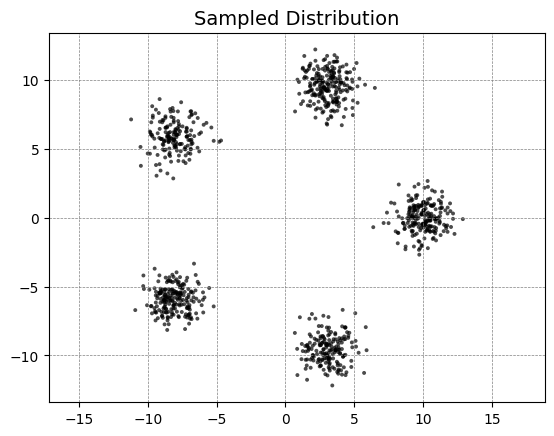

In [3]:
sampels = GaussianMix.sample(1000)
plot_samples(sampels)

In [18]:
sde = GuidanceLangevin(model1, alpha=LinearAlpha(), beta=SquareRootBeta(), sigma=0.5,guidance_scale=10.0)
solver = EulerSDESolver(sde)
sampler = Sampler(solver)

steps = torch.linspace(0.01, 1, 2000).view(1,-1,1).expand(2000,-1,1).to(device)
gaussian_samples = gaussian_path.p_init.sample(2000)
final_samples = sampler.sample_without_traj(gaussian_path.p_init.sample(2000), steps, y = torch.Tensor([10.0,0.0]).expand(gaussian_samples.shape[0], -1).to(device))

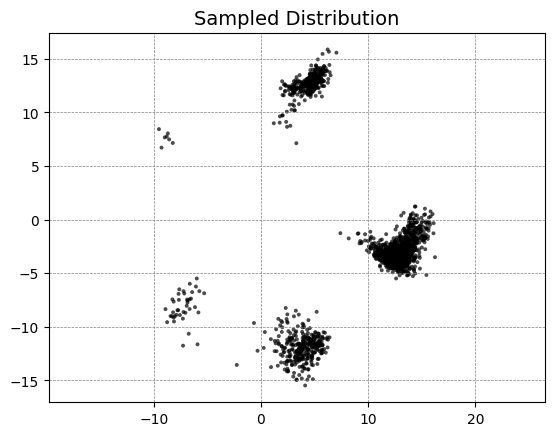

In [19]:
plot_samples(final_samples)
plt.show()